<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/GQtest_cluster_data(y_hat)_demoHeteroScedasticity_Sugar_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = '/content/drive/My Drive/pattern_realdata'

In [ ]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'demo_HeteroScedasticity.csv')

In [ ]:
df = pd.read_csv(file_path)
df

,rep,index,Age,Sugar,Size,Residuals(Sugar),Residuals(Size)
0,0,1,1,0.38,0.38,-1.38094,2.40663
1,0,2,2,4.52,5.03,0.75546,4.97704
2,0,3,3,6.30,6.89,0.53186,4.75745
3,0,4,4,8.39,9.58,0.61826,5.36786
4,0,5,5,8.99,4.96,-0.78534,-1.33173
...,...,...,...,...,...,...,...
95,0,96,96,191.15,110.61,-0.95286,-84.92447
96,0,97,97,192.51,49.44,-1.59646,-148.17406
97,0,98,98,198.27,418.77,2.15994,219.07635
98,0,99,99,198.67,264.41,0.55634,62.63676


In [ ]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

Age   Sugar    Size  Residuals(Sugar)  Residuals(Size)
rep index                                                        
0   1        1    0.38    0.38          -1.38094          2.40663
    2        2    4.52    5.03           0.75546          4.97704
    3        3    6.30    6.89           0.53186          4.75745
    4        4    8.39    9.58           0.61826          5.36786
    5        5    8.99    4.96          -0.78534         -1.33173
...        ...     ...     ...               ...              ...
    96      96  191.15  110.61          -0.95286        -84.92447
    97      97  192.51   49.44          -1.59646       -148.17406
    98      98  198.27  418.77           2.15994        219.07635
    99      99  198.67  264.41           0.55634         62.63676
    100    100  199.64  163.74          -0.47726        -40.11283

[100 rows x 5 columns]

In [ ]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

Age   Sugar    Size  Residuals(Sugar)  Residuals(Size)
rep index                                                        
0   1        1    0.38    0.38          -1.38094          2.40663
    2        2    4.52    5.03           0.75546          4.97704
    3        3    6.30    6.89           0.53186          4.75745
    4        4    8.39    9.58           0.61826          5.36786
    5        5    8.99    4.96          -0.78534         -1.33173
...        ...     ...     ...               ...              ...
    96      96  191.15  110.61          -0.95286        -84.92447
    97      97  192.51   49.44          -1.59646       -148.17406
    98      98  198.27  418.77           2.15994        219.07635
    99      99  198.67  264.41           0.55634         62.63676
    100    100  199.64  163.74          -0.47726        -40.11283

[100 rows x 5 columns]

In [ ]:
table.reset_index(inplace=True)
table

,rep,index,Age,Sugar,Size,Residuals(Sugar),Residuals(Size)
0,0,1,1,0.38,0.38,-1.38094,2.40663
1,0,2,2,4.52,5.03,0.75546,4.97704
2,0,3,3,6.30,6.89,0.53186,4.75745
3,0,4,4,8.39,9.58,0.61826,5.36786
4,0,5,5,8.99,4.96,-0.78534,-1.33173
...,...,...,...,...,...,...,...
95,0,96,96,191.15,110.61,-0.95286,-84.92447
96,0,97,97,192.51,49.44,-1.59646,-148.17406
97,0,98,98,198.27,418.77,2.15994,219.07635
98,0,99,99,198.67,264.41,0.55634,62.63676


In [ ]:
table.set_index(['rep', 'index'], inplace=True)

In [ ]:
table

Age   Sugar    Size  Residuals(Sugar)  Residuals(Size)
rep index                                                        
0   1        1    0.38    0.38          -1.38094          2.40663
    2        2    4.52    5.03           0.75546          4.97704
    3        3    6.30    6.89           0.53186          4.75745
    4        4    8.39    9.58           0.61826          5.36786
    5        5    8.99    4.96          -0.78534         -1.33173
...        ...     ...     ...               ...              ...
    96      96  191.15  110.61          -0.95286        -84.92447
    97      97  192.51   49.44          -1.59646       -148.17406
    98      98  198.27  418.77           2.15994        219.07635
    99      99  198.67  264.41           0.55634         62.63676
    100    100  199.64  163.74          -0.47726        -40.11283

[100 rows x 5 columns]

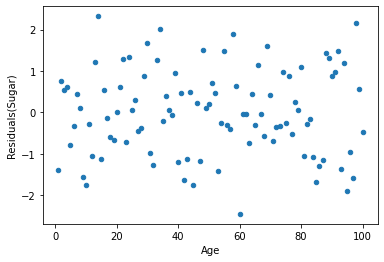

In [ ]:
tablenew0 = table.loc[0.0]
tablenew0.plot(x ='Age', y='Residuals(Sugar)', kind = 'scatter')

In [ ]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["Sugar"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Residuals(Sugar)']]
    x = data_cluster0[['Age']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Residuals(Sugar)']]
    x = data_cluster1[['Age']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0,49.0,49.0,50.27847068889424,56.003851359107934,1.026091238548862,1.142935742022611,1.1138734052919064,0.7073324936359411,0.6463337531820295,0.35366624681797054,Reject001=1 : Homoscedasticity


In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0,49.0,49.0,50.27847068889424,56.003851359107934,1.026091238548862,1.142935742022611,1.1138734052919064,0.7073324936359411,Reject001=1 : Homoscedasticity


In [ ]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity    1
Name: Result_test, dtype: int64